In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data= pd.read_excel('Online Retail.xlsx')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Check missing values

In [3]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
data.shape

(541909, 8)

### Check unique values

In [5]:
for feature in data.columns[:]:
    print(feature,'has',data[feature].nunique(),'unique values')

InvoiceNo has 25900 unique values
StockCode has 4070 unique values
Description has 4223 unique values
Quantity has 722 unique values
InvoiceDate has 23260 unique values
UnitPrice has 1630 unique values
CustomerID has 4372 unique values
Country has 38 unique values


### Exploratory Data Analysis

In [6]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


The mean quantities of each product purchased are about 9.55 units(round of at 10), median quantity is 3 units and the max quantity puchased is 80995 which is quite high. Some negative quantities were also noticed therefore it implies that those quantities were either returned or cancelled

#### Cancelled orders

it is even stated in the description of the dataset that when invoiceno. starts with C it implies that the transaction was cancelled

In [7]:
cancelled_ord=data[data['InvoiceNo'].astype('str').str.contains('C')]
cancelled_ord.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


We shall check the outlier quantity of -80995 in the cancelled transactions

In [9]:
cancelled_ord[cancelled_ord['Quantity']==-80995]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


Now its important to find out the number of cancelled orders 

In [10]:
cancelled_ord.shape

(9288, 8)

So 9288 orders ahve been cancelled, in terms of percentage 9288/25900 =35.86%

#### Number of products per invoice

In [13]:
ef_1=data.groupby(['InvoiceNo','CustomerID'],as_index=False)['Description'].count()
transac_df=ef_1.rename(columns={'Description':'Number_of_products'})
transac_df.head()

,InvoiceNo,CustomerID,Number_of_products
0,536365,17850.0,7
1,536366,17850.0,2
2,536367,13047.0,12
3,536368,13047.0,4
4,536369,13047.0,1


From the above diagram it shall be understood that the products are purchased by the same customers at different time periods because the Invoices are different

In [15]:
transac_df.describe()

,CustomerID,Number_of_products
count,22190.000000,22190.000000
mean,15238.498738,18.333889
std,1733.149624,23.892111
min,12346.000000,1.000000
25%,13755.000000,3.000000
50%,15136.000000,12.000000
75%,16746.000000,24.000000
max,18287.000000,542.000000


So the mean number of products customers puchase everytime are 18, minimum purchase is 1 while the maximum is staggeringly large 542

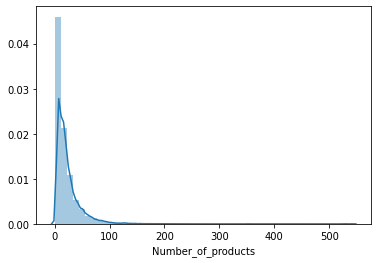

In [17]:
sns.distplot(transac_df['Number_of_products'])
plt.show()

However from a subjective perspective its worth finding how many Large purchasing parties are there

#### Large Buyers

In [19]:
Large_buyers=transac_df[transac_df['Number_of_products']>200]
Large_buyers.head()

,InvoiceNo,CustomerID,Number_of_products
2498,543040,17337.0,259
4148,547063,14769.0,294
7007,554098,14769.0,264
7956,556484,16938.0,205
10172,562031,16984.0,277


In [20]:
Large_buyers.shape

(26, 3)

In [21]:
Large_buyers.groupby('CustomerID').sum().sort_values(by='Number_of_products',ascending=False)

,Number_of_products
CustomerID,
14096.0,4968
14769.0,957
16984.0,277
12536.0,259
17337.0,259
17813.0,239
17571.0,223
12378.0,219
14456.0,217


Here we have the list of special customers who have so far purchased highest number of products from the retail store and like a needle in a haystack customer 14096 is so far the largest buyer from the store. It would be entirely right to say that these customers are eleigible for some special offers.

#### Revenue from the European Union

In [ ]:
# To find the revenue value we must create feature total cost after multiplying unit price with quantity

In [22]:
data['Total_cost']=data['Quantity']*data['UnitPrice']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


Create seperte datafram for each country

In [29]:
franc= data[data['Country']=='France']
nether=data[data['Country']=='Netherlands']
germ=data[data['Country']=='Germany']
italy=data[data['Country']=='Italy']
belg=data[data['Country']=='Belgium']
austr=data[data['Country']=='Austria']
spain=data[data['Country']=='Spain']
nor=data[data['Country']=='Norway']
den=data[data['Country']=='Denmark']
swed=data[data['Country']=='Sweden']
fin=data[data['Country']=='Finland']
cyp=data[data['Country']=='Cyprus']
malt=data[data['Country']=='Malta']
port=data[data['Country']=='Portugal']

In [30]:
EU_df=pd.concat([franc,nether,germ,italy,belg,austr,spain,nor,den,swed,fin,cyp,malt,port],axis=0)
EU_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_cost
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,90.0
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France,90.0
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France,45.0
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France,10.2
30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France,15.6


In [31]:
EU_df.shape

(31129, 9)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'France'),
  Text(1, 0, 'Netherlands'),
  Text(2, 0, 'Germany'),
  Text(3, 0, 'Italy'),
  Text(4, 0, 'Belgium'),
  Text(5, 0, 'Austria'),
  Text(6, 0, 'Spain'),
  Text(7, 0, 'Norway'),
  Text(8, 0, 'Denmark'),
  Text(9, 0, 'Sweden'),
  Text(10, 0, 'Finland'),
  Text(11, 0, 'Cyprus'),
  Text(12, 0, 'Malta'),
  Text(13, 0, 'Portugal')])

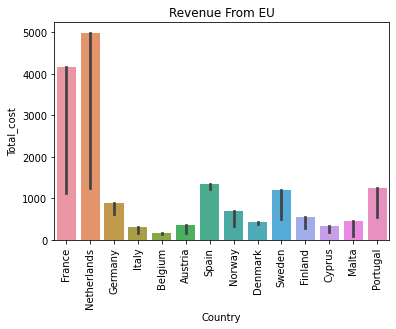

In [34]:
sns.barplot(x='Country',y='Total_cost',data=EU_df,estimator=max)
plt.title('Revenue From EU')
plt.xticks(rotation=90)

As we can see the largest market is Netherlands followed by France while the smallest market is belgium